### 這個工作的目標是在不斷變化的台股市場中尋找穩定獲利的進出場策略。策略名稱取自《易經》，以表徵市場的盤勢發展，並協助投資者趨吉避凶。



In [2]:
import datetime

from dateutil.relativedelta import relativedelta

from 變易 import util, dataset

dataset.datatime_range

{'max_price': Timestamp('2023-06-29 00:00:00'),
 'max_pera': Timestamp('2023-06-29 00:00:00'),
 'max_revenue': Timestamp('2023-06-10 00:00:00'),
 'max_fin_stmt': Timestamp('2023-05-15 00:00:00'),
 'min_price': Timestamp('2023-06-21 00:00:00'),
 'min_pera': Timestamp('2023-06-21 00:00:00'),
 'min_revenue': Timestamp('2018-02-10 00:00:00'),
 'min_fin_stmt': Timestamp('2019-05-15 00:00:00')}

# 不易：利貞

In [28]:
df = dataset.analyze_profit_df()
df = dataset.append_stock_info(df)
df.round(2)

,name,group,殖利率(%),股利年度,本益比,股價淨值比,每股盈餘,毛利率（%）,淨利率（%）,資產報酬率（%）,股東報酬率（%）,毛利率(%)增加,淨利率(%）增加,資產報酬率(%)增加,股東報酬率(%)增加,負債比(%)增加,普通股股本增加,資產總計增加,權益總額增加
code,,,,,,,,,,,,,,,,,,,
1101,台泥,水泥工業,1.31,111,50.07,1.27,0.76,33.02,12.86,0.93,1.82,0.0,0.0,-0.35,-0.67,-0.30,0.0,839407.0,1805254.0
1102,亞泥,水泥工業,5.15,111,13.02,1.01,3.68,47.27,56.93,3.85,6.98,0.0,0.0,0.63,1.19,2.88,0.0,9599791.0,-4175360.0
1103,嘉泥,水泥工業,2.34,111,NaN,0.62,-0.13,28.31,-21.43,-0.18,-0.30,0.0,0.0,-0.03,-0.05,-1.18,0.0,936998.0,1006731.0
1104,環泥,水泥工業,5.90,111,11.21,0.93,2.72,76.83,103.65,7.03,9.15,0.0,0.0,-1.61,-2.10,-1.06,0.0,322963.0,549062.0
1108,幸福,水泥工業,4.66,111,10.59,1.47,1.62,95.16,58.79,6.95,13.82,0.0,0.0,-1.55,-2.94,2.20,0.0,35436.0,-195578.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951,皇田,電機機械,4.41,111,13.15,1.72,2.09,50.60,13.79,2.92,4.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9955,佳龍,其他業,0.00,111,NaN,1.81,-1.11,-2.29,-44.30,-3.98,-8.17,0.0,0.0,-0.08,-0.30,2.71,0.0,101331.0,-31154.0
9958,世紀鋼,鋼鐵工業,0.39,111,392.42,4.32,0.32,5.73,-10.78,-1.09,-3.03,0.0,0.0,1.27,3.62,4.54,0.0,4237041.0,-48124.0


# 不易：元亨

In [26]:
dataset.analyze_epsa_df().iloc[:,0:21].round(2)

,收盤價,漲跌幅(%),殖利率(%),股利年度,本益比,股價淨值比,(C)PER,(C)EPS,E(Sum),E(Avg),...,E(0),E(1),E(2),E(3),外%(0),外%(1),外%(2),外%(3),淨利率（%）,毛利率（%）
code,,,,,,,,,,,,,,,,,,,,,
1101,38.05,0.00,1.31,111,50.07,1.27,67.69,0.14,0.76,0.19,...,0.20,0.36,0.22,-0.02,130.74,56.51,90.06,-167.21,3.82,9.39
1102,44.65,0.11,5.15,111,13.02,1.01,14.30,0.78,3.68,0.92,...,0.81,0.19,1.33,1.35,62.32,-5.82,68.77,54.75,14.41,10.31
1103,21.40,-0.70,2.34,111,NaN,0.62,160.15,0.03,-0.13,-0.03,...,0.03,0.05,0.41,-0.62,315.70,319.48,144.23,72.55,3.97,9.62
1104,30.50,-0.49,5.90,111,11.21,0.93,17.78,0.43,2.72,0.68,...,0.42,0.92,0.87,0.51,43.41,71.18,72.55,60.39,15.27,18.77
1108,17.15,-0.29,4.66,111,10.59,1.47,13.64,0.31,1.62,0.40,...,0.31,0.69,0.33,0.29,8.53,-2.09,10.23,-13.65,11.64,18.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951,74.80,-0.40,4.41,111,13.15,1.72,13.87,1.35,2.09,1.04,...,1.35,NaN,NaN,0.74,17.61,NaN,NaN,19.97,8.24,26.39
9955,23.90,-0.84,0.00,111,NaN,1.81,-19.41,-0.31,-1.11,-0.28,...,-0.31,-0.28,-0.28,-0.24,8.30,18.97,-12.30,1.81,-12.10,-0.16
9958,129.50,8.88,0.39,111,392.42,4.32,-1049.64,-0.03,0.32,0.08,...,0.20,-0.61,0.68,0.05,1084.46,40.55,73.64,-75.19,-0.27,6.17


# 不易：躍龍在淵

In [5]:
# 股票資訊
STOCK_COL = ['name', 'group']
securities = dataset.securities
stock_info = securities[ (securities['type'] == '股票') | (securities['type'] == '特別股') ][STOCK_COL]  # (securities['type'] == 'ETF')

# 月營收
m0_ts = util.time2monthly_date(datetime.datetime.now())
revenues = dataset.revenues
m0_revenue = revenues.loc[m0_ts]
m1_revenue = revenues.loc[m0_ts - relativedelta(months=1)]
m2_revenue = revenues.loc[m0_ts - relativedelta(months=2)]
my_revenue = revenues.loc[m0_ts - relativedelta(years=1)]

REVENUE_COL = ['當月營收', 'YoY(%)', 'MoM(%)',	'IsM3', ]
M = m0_revenue[['當月營收']]
M = M.merge(right=m1_revenue[['當月營收']], on=['code'], how='left', suffixes=('', '_m1'))
M = M.merge(right=m2_revenue[['當月營收']], on=['code'], how='left', suffixes=('', '_m2'))
M = M.merge(right=my_revenue[['當月營收']], on=['code'], how='left', suffixes=('', '_my'))
M['YoY(%)'] = (M['當月營收'] - M['當月營收_my']) / M['當月營收_my'] * 100
M['MoM(%)'] = (M['當月營收'] - M['當月營收_m1']) / M['當月營收_m1'] * 100
M['IsM3'] = (M['當月營收'] > M['當月營收_m1']) & (M['當月營收_m1'] > M['當月營收_m2'])
M = dataset.append_stock_info(M)
M = M[M['MoM(%)'] != float('inf')]
M.sort_values('MoM(%)', ascending=False).iloc[:][ STOCK_COL +  REVENUE_COL].round(2)


,name,group,當月營收,YoY(%),MoM(%),IsM3
code,,,,,,
1805,寶徠,建材營造業,77846.0,2095.32,15254.24,False
1808,潤隆,建材營造業,2263754.0,4327.10,11171.99,False
2442,新美齊,電腦及週邊設備業,1145506.0,163.12,2617.43,True
2542,興富發,建材營造業,3535467.0,904.37,441.65,False
2524,京城,建材營造業,219383.0,-14.16,359.23,False
...,...,...,...,...,...,...
9949,琉園,文化創意業,17494.0,NaN,NaN,False
9950,萬國通,塑膠工業,296068.0,NaN,NaN,False
9951,皇田,電機機械,404628.0,NaN,NaN,False


# 不易：風升

In [4]:
dataset.fin_profits.round(2)

基本每股盈餘合計  營業外收入及支出合計   營業毛利（毛損）  營業毛利（毛損）淨額   本期淨利（淨損）  \
ts         code                                                           
2019-05-15 1101      0.77    570533.0  6487864.0   6487864.0  4229970.0   
           1102      0.93    965675.0  4658501.0   4658501.0  3810086.0   
           1103      0.20    227459.0    65221.0     65221.0   148581.0   
           1104      0.24    147232.0   106420.0    106420.0   156601.0   
           1108     -0.07     -8688.0    26663.0     26663.0   -29773.0   
...                   ...         ...        ...         ...        ...   
2023-05-15 9951      1.35     17783.0   323449.0    323449.0   100993.0   
           9955     -0.31     -2636.0     -414.0      -414.0   -31769.0   
           9958      0.20    -77734.0   164956.0    164956.0    -7168.0   
           9960      0.59      4524.0    66043.0     66043.0    19940.0   
           9962      0.48      -424.0    78916.0     78916.0    43061.0   

                     營業收入合計  繼續營業單位稅前淨利（淨損）  繼續營業單位本期淨利（淨損）  母公司業主（淨利／損）  \
ts         code                                                            
2019-05-15 1101  25356328.0       5603495.0       4229970.0    3951920.0   
           1102  19385675.0       4743411.0       3810086.0    2929272.0   
           1103    452376.0        171491.0        147730.0     126476.0   
           1104   1187296.0        157355.0        156601.0     155181.0   
           1108    834345.0        -35049.0        -29773.0     -29773.0   
...                     ...             ...             ...          ...   
2023-05-15 9951   1225813.0        130166.0        100993.0     100993.0   
           9955    262585.0        -31769.0        -31769.0     -31769.0   
           9958   2675284.0         -4600.0         -7168.0      47789.0   
           9960    180868.0         26115.0         19940.0      19940.0   
           9962    912288.0         53876.0         43061.0      43061.0   

                 繼續營業單位淨利（淨損）  ...    (C)平均月營收  (C)合計月數  毛利率（%）  淨利率（%）  \
ts         code                ...                                        
2019-05-15 1101          0.77  ...  8452110.33        3   25.59   16.68   
           1102           NaN  ...  6463535.00        3   24.03   19.65   
           1103          0.20  ...   150797.00        3   14.42   32.84   
           1104           NaN  ...   395765.33        3    8.96   13.19   
           1108         -0.07  ...   278115.67        3    3.20   -3.57   
...                       ...  ...         ...      ...     ...     ...   
2023-05-15 9951          1.34  ...   368737.00        1   26.39    8.24   
           9955         -0.31  ...    87495.33        3   -0.16  -12.10   
           9958           NaN  ...   891764.67        3    6.17   -0.27   
           9960           NaN  ...    59256.00        1   36.51   11.02   
           9962           NaN  ...   281173.00        1    8.65    4.72   

                      普通股股本         資產總計        權益總額  資產報酬率（%）  股東報酬率（%）  \
ts         code                                                            
2019-05-15 1101  51080599.0  365525031.0         NaN      1.16       NaN   
           1102  33614472.0  286909551.0         NaN      1.33       NaN   
           1103   7747805.0   34436093.0         NaN      0.43       NaN   
           1104   6536092.0   23115808.0         NaN      0.68       NaN   
           1108   4047380.0    7507236.0         NaN     -0.40       NaN   
...                     ...          ...         ...       ...       ...   
2023-05-15 9951    749000.0    5483331.0   3265776.0      1.84      3.09   
           9955   1032082.0    2970500.0   1365281.0     -1.07     -2.33   
           9958   2323964.0   33597183.0  10192935.0     -0.02     -0.07   
           9960    335925.0    1331262.0    626037.0      1.50      3.19   
           9962    902203.0    1429313.0   1085001.0      3.01      3.97   

                 負債比(%)  
ts         code          
2019-05-15 1101     NaN  
         

<Axes: xlabel='ts'>

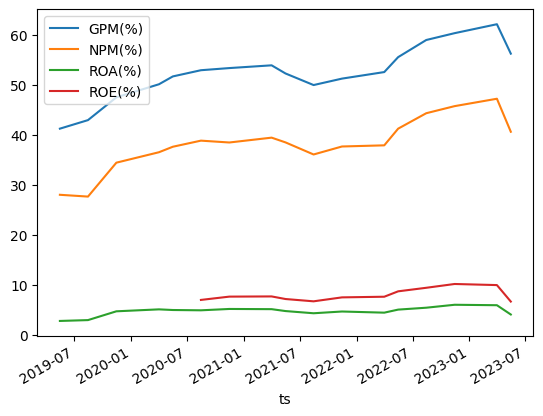

In [22]:
# 台積電獲利能力

df = dataset.fin_profits.round(2)
df = dataset.reverse_df_index(df)

cols = ['毛利率（%）', '淨利率（%）', '資產報酬率（%）' ,'股東報酬率（%）' ]
col_map = {
    '毛利率（%）': 'GPM(%)',
    '淨利率（%）': 'NPM(%)',
    '資產報酬率（%）': 'ROA(%)',
    '股東報酬率（%）': 'ROE(%)',
}
df = df.loc['2330'][cols]
df = df.rename(columns=col_map)
df.plot()

<Axes: >

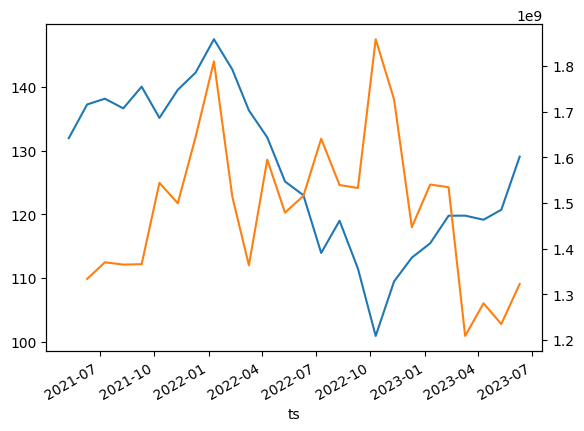

In [23]:
# TW50 股價-營收 趨勢觀察

# connection = util.get_db_proxy().connection
# dataset.refresh_revenues(connection, datetime.datetime(2021, 5, 1))
# dataset.refresh_prices(connection, datetime.datetime(2021, 5, 1))
# connection.close()

TW50 = [ '台積電', '鴻海', '聯發科', '台達電', '聯電', '中華電', '中信金', '兆豐金', '玉山金', '南亞', '日月光投控', '中鋼', '台塑', '廣達', 
        '中租-KY', '第一金', '合庫金', '聯詠', '和泰車', '台泥', '台化', '大立光', '華南金', '亞德客-KY', '華新', '台塑化', '彰銀', 
        '矽力*-KY', '陽明', '萬海', '豐泰', '南亞科'] + ["元大金", "台灣大", "國泰金", "富邦金", "統一", "統一超", "遠傳", "遠東新", "開發金"]

_revenues = dataset.revenues.reset_index()
_revenues = _revenues[ (_revenues['ts'] > datetime.datetime(2021, 5, 10)) & (_revenues['ts'] < datetime.datetime(2023, 7, 1)) ]
_revenues = dataset.append_stock_info(_revenues).set_index(['name'])
_revenues = _revenues.loc[TW50][['當月營收', 'ts']]
# _revenues.groupby(['ts']).count()
_revenues = _revenues.groupby(['ts']).sum()
_revenues

_prices = dataset.prices.reset_index()
_prices = _prices[ (_prices['ts'] > datetime.datetime(2021, 5, 10)) & (_prices['ts'] < datetime.datetime(2023, 7, 1)) ]
_prices = dataset.append_stock_info(_prices).set_index(['name'])
_prices = _prices.loc['元大台灣50'][['收盤價', 'ts']]
_prices['ts'] = _prices['ts'].apply(lambda x: datetime.datetime(x.year, x.month, 10))
_prices = _prices.groupby(['ts']).mean()

_prices['收盤價'].plot()
_revenues['當月營收'].plot(secondary_y=True)

# 不易：飛龍在天

In [7]:
epsa_df = dataset.epsa_df

epsa_df["YoY(%)"] = (
    (epsa_df["本期淨利（淨損）"] - epsa_df["本期淨利（淨損）_q4"]) / epsa_df["本期淨利（淨損）_q4"] * 100
)
epsa_df["MoM(%)"] = (
    (epsa_df["本期淨利（淨損）"] - epsa_df["本期淨利（淨損）_q1"]) / epsa_df["本期淨利（淨損）_q1"] * 100
)
epsa_df["IsQ3"] = (epsa_df["本期淨利（淨損）"] > epsa_df["本期淨利（淨損）_q1"]) & (
    epsa_df["本期淨利（淨損）_q1"] > epsa_df["本期淨利（淨損）_q2"]
)
epsa_df = epsa_df.sort_values(['MoM(%)', 'YoY(%)'], ascending=False)

epsa_df[['本期淨利（淨損）', 'YoY(%)', 'MoM(%)',	'IsQ3', ]].head(10).round(2)

,本期淨利（淨損）,YoY(%),MoM(%),IsQ3
code,,,,
6246,-11884.0,103.04,169671.43,False
4933,9169.0,-89.62,20738.64,False
1538,-12682.0,-58.44,17037.84,False
2440,-22359.0,12532.20,11192.42,False
4123,978177.0,15.14,5469.85,True
2369,-103258.0,-172.49,4796.06,False
2615,-2112792.0,-105.20,4762.02,False
6153,-860911.0,493.63,2939.30,False
5533,369783.0,-39.44,2827.58,False


# 不易：亢龍有悔